In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("input/train.csv")
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.replace(["female", "male"], [0, 1], inplace=True)
data_train.fillna(0, inplace=True)
data_train.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_30156\2688459203.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.replace(["female", "male"], [0, 1], inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


In [4]:
X_train = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])
Y_train = np.array(data_train[["Survived"]])

Model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation="sigmoid"),     # input layer
    tf.keras.layers.Dense(20, activation="relu"),       # hidden layer 1
    tf.keras.layers.Dense(8, activation="sigmoid"),     # hidden layer 2
    tf.keras.layers.Dense(2, activation="softmax")      # output layer
])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


In [7]:
output_train = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5811 - loss: 0.6636
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6662 - loss: 0.6314 
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 0.6255 
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6774 - loss: 0.5868 
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7063 - loss: 0.5605 
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.7281 - loss: 0.5206
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7185 - loss: 0.5319 
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7652 - loss: 0.5084 
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7629 - loss: 0.4954 
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7581 - loss: 0.4994 
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7875 - loss: 0.4920 
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

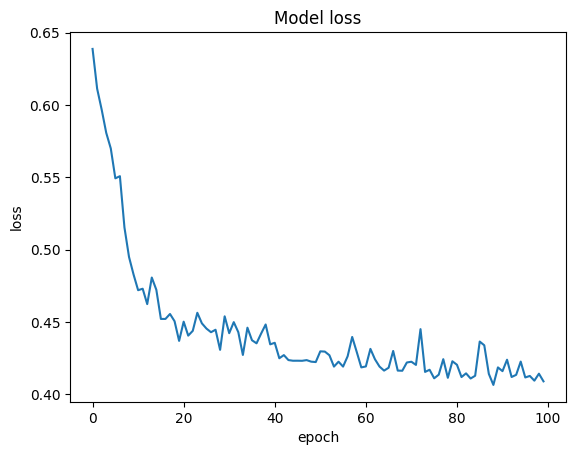

In [8]:
plt.plot(output_train.history["loss"])
plt.title("Model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

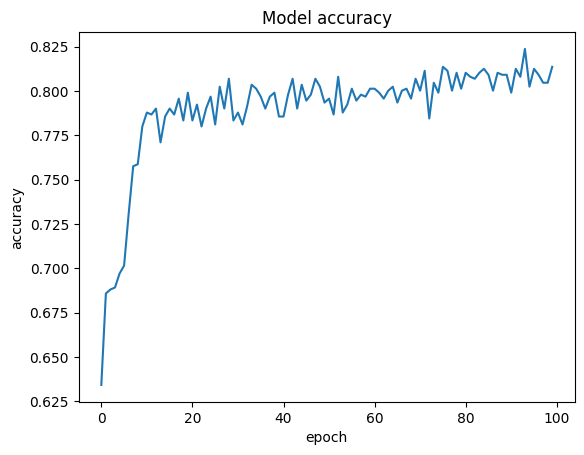

In [9]:
plt.plot(output_train.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

Evaluating the model on test dataset

In [11]:
data_test = pd.read_csv("input/test.csv")
data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
data_test.replace(["female", "male"], [0, 1], inplace=True)
data_test.fillna(0, inplace=True)
# data_test.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_30156\54394477.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.replace(["female", "male"], [0, 1], inplace=True)


In [15]:
X_test = np.array(data_test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])

target = pd.read_csv("input/gender_submission.csv")
Y_test = np.array(target[["Survived"]])

In [16]:
model.evaluate(X_test, Y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.2910  


[0.27582988142967224, 0.8851674795150757]

Model prediction on Jack and Rose data

In [18]:
Jack = [3, 1, 19, 0, 0, 5.0000]
Rose = [1, 0, 17, 1, 2, 100.0000]

Jack_pred = model.predict([Jack])
Rose_pred = model.predict([Rose])

Jack_pred = np.where(Jack_pred > 0.5, 1, 0)
Rose_pred = np.where(Rose_pred > 0.5, 1, 0)

print("Jack survival:", Jack_pred[0][1])
print("Rose survival:", Rose_pred[0][1])

ValueError: Unrecognized data type: x=[[3, 1, 19, 0, 0, 5.0]] (of type <class 'list'>)